# **Tingkat Kehadiran Siswa dan Dampaknya terhadap Prestasi Akademik**


# **Import library**


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.impute import KNNImputer

# **Business Understanding**

## **Bussiness Objective**


 Sekolah memiliki banyak data terkait aktivitas belajar siswa seperti jumlah login, durasi belajar, aktivitas forum, penggunaan internet, serta data nilai akademik dan kehadiran. Namun, pihak sekolah belum mengetahui secara pasti faktor apa yang paling berpengaruh terhadap performa akademik siswa. Oleh karena itu, diperlukan analisis untuk memahami hubungan antara perilaku belajar digital, kehadiran, dan hasil akademik agar sekolah dapat mengambil keputusan yang lebih tepat berbasis data. Tujuan dari analisis ini adalah untuk mengidentifikasi faktor-faktor yang memengaruhi performa akademik siswa serta membangun model prediksi kategori performa. Hasil analisis diharapkan dapat membantu sekolah mendeteksi siswa yang berisiko memiliki performa rendah dan memberikan intervensi yang sesuai untuk meningkatkan hasil belajar.


## **Assess Situation**

Sekolah sudah memiliki data sebanyak 2000 siswa dengan 26 variabel yang berisi informasi tentang data diri siswa, aktivitas belajar online, kehadiran, dan nilai akademik. Data ini cukup lengkap dan relevan untuk dianalisis karena mencakup faktor perilaku belajar dan hasil akademik. Memang ada sedikit data yang kosong di beberapa kolom.

## **Analytic Goals**


Tujuan dari analisis ini adalah untuk mengetahui faktor-faktor apa saja yang memengaruhi performa akademik siswa berdasarkan data yang tersedia, seperti aktivitas belajar online, kehadiran, serta nilai tugas dan ujian. Analisis ini juga bertujuan untuk memahami pola perbedaan antara siswa dengan performa tinggi, sedang, dan rendah. Selain itu, akan dibuat model prediksi yang dapat mengelompokkan siswa ke dalam kategori High, Medium, atau Low sehingga sekolah dapat lebih cepat mengetahui siswa yang membutuhkan perhatian atau bantuan tambahan.


## **Project Plan**

Tahapan proyek dimulai dengan proses pembersihan data, seperti menangani data yang kosong dan memastikan semua data sudah sesuai format. Setelah itu dilakukan analisis eksplorasi untuk melihat pola, tren, dan hubungan antar variabel, misalnya hubungan antara kehadiran dengan nilai akhir atau aktivitas login dengan performa siswa. Selanjutnya dilakukan pemilihan variabel yang paling berpengaruh, kemudian membangun model klasifikasi untuk memprediksi kategori performa siswa. Terakhir, hasil model akan dievaluasi untuk melihat tingkat akurasinya, lalu disusun rekomendasi yang dapat digunakan oleh pihak sekolah dalam mengambil keputusan.

# **Data Understanding**

## **Memuat Dataset**

Dataset ini berasal dari data perilaku siswa pendidikan vokasi yang digunakan untuk menganalisis pola belajar dan mengevaluasi kinerja akademik siswa.

In [33]:
file = '/content/drive/MyDrive/AVD 2026/vocational_student_behavioral_dataset_V4.csv'

df = pd.read_csv(file)
df

,student_id,age,gender,socioeconomic_status,region,total_logins,weekly_login_count,avg_session_duration,resource_click_count,forum_posts,...,tab_switch_count,total_classes,classes_attended,assignment_score_avg,quiz_score_avg,midterm_exam_score,final_exam_score,attendance_percentage,overall_performance_score,performance_label
0,S1861,19,Male,High,West,59,6,66.079121,22.0,2,...,12,60,55,88.9,100.0,93.2,91.9,91.67,93.31,High
1,S0354,24,Female,Medium,South,19,9,52.658783,50.0,2,...,2,60,41,50.4,36.6,57.3,39.5,68.33,46.44,Low
2,S1334,23,Male,Medium,North,44,2,45.854387,10.0,2,...,4,60,48,77.6,74.2,66.8,71.5,80.00,71.85,High
3,S0906,23,Female,Medium,East,43,4,48.918866,76.0,0,...,4,60,52,76.8,63.7,74.7,70.0,86.67,71.51,Medium
4,S1290,17,Male,High,North,28,2,59.170770,31.0,3,...,4,60,47,69.5,67.1,67.9,68.5,78.33,68.24,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,S1131,24,Female,High,South,30,9,51.422920,24.0,5,...,3,60,49,67.8,65.6,76.2,73.2,81.67,71.50,Medium
1996,S1295,20,Female,Low,North,34,5,54.960325,95.0,6,...,3,60,51,76.0,61.9,74.4,78.6,85.00,73.48,Medium
1997,S0861,18,Female,Low,North,26,1,37.856134,54.0,1,...,4,60,46,69.3,63.2,75.5,78.7,76.67,72.76,Medium
1998,S1460,23,Male,High,South,46,8,51.736719,18.0,7,...,2,60,56,86.5,95.8,85.6,94.2,93.33,90.40,High


## **Deksriptif Data**

### **Informasi Dasar**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   2000 non-null   object 
 1   age                          2000 non-null   int64  
 2   gender                       2000 non-null   object 
 3   socioeconomic_status         2000 non-null   object 
 4   region                       2000 non-null   object 
 5   total_logins                 2000 non-null   int64  
 6   weekly_login_count           2000 non-null   int64  
 7   avg_session_duration         1940 non-null   float64
 8   resource_click_count         1940 non-null   float64
 9   forum_posts                  2000 non-null   int64  
 10  quiz_attempts_count          2000 non-null   int64  
 11  video_watch_completion_rate  2000 non-null   float64
 12  daily_internet_usage_mins    1940 non-null   float64
 13  edu_sites_visit_co

Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 2000 Baris dan 26 Kolom

### **Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   2000 non-null   object 
 1   age                          2000 non-null   int64  
 2   gender                       2000 non-null   object 
 3   socioeconomic_status         2000 non-null   object 
 4   region                       2000 non-null   object 
 5   total_logins                 2000 non-null   int64  
 6   weekly_login_count           2000 non-null   int64  
 7   avg_session_duration         1940 non-null   float64
 8   resource_click_count         1940 non-null   float64
 9   forum_posts                  2000 non-null   int64  
 10  quiz_attempts_count          2000 non-null   int64  
 11  video_watch_completion_rate  2000 non-null   float64
 12  daily_internet_usage_mins    1940 non-null   float64
 13  edu_sites_visit_co

**1. student_id**

* Jumlah baris: 2000

* Tipe data: object

* Deskripsi: ID siswa

**2. age**

* Jumlah baris: 2000

* Tipe data: int64

* Deskripsi: Usia siswa

**3. gender**

* Jumlah baris: 2000

* Tipe data: object

* Deskripsi: Jenis kelamin

**4. socioeconomic_status**

* Jumlah baris: 2000

* Tipe data: object

* Deskripsi: Status sosial ekonomi

**5. region**

* Jumlah baris: 2000

* Tipe data: object

* Deskripsi: Wilayah siswa

**6. total_logins**

* Jumlah baris: 2000

* Tipe data: int64

* Deskripsi: Total login ke sistem

**7. weekly_login_count**

* Jumlah baris: 2000

* Tipe data: int64

* Deskripsi: Jumlah login per minggu

**8. avg_session_duration**

* Jumlah baris: 1940

* Tipe data: float64

* Deskripsi: Rata-rata durasi sesi belajar

**9. resource_click_count**

* Jumlah baris: 1940

* Tipe data: float64

* Deskripsi: Jumlah klik materi belajar

**10. forum_posts**

* Jumlah baris: 2000

* Tipe data: int64

* Deskripsi: Jumlah posting forum

**11. quiz_attempts_count**

* Jumlah baris: 2000

* Tipe data: int64

* Deskripsi: Jumlah percobaan kuis

**12. video_watch_completion_rate**

* Jumlah baris: 2000

* Tipe data: float64

* Deskripsi: Tingkat penyelesaian video

**13. daily_internet_usage_mins**

* Jumlah baris: 1940

* Tipe data: float64

* Deskripsi: Durasi penggunaan internet harian

**14. edu_sites_visit_count**

* Jumlah baris: 2000

* Tipe data: int64

* Deskripsi: Kunjungan ke situs edukasi

**15. nonedu_sites_visit_count**

* Jumlah baris: 2000

* Tipe data: int64

* Deskripsi: Kunjungan ke situs non-edukasi

**16. peak_usage_time**

* Jumlah baris: 2000

* Tipe data: object

* Deskripsi: Waktu penggunaan tertinggi

**17. tab_switch_count**

* Jumlah baris: 2000

* Tipe data: int64

* Deskripsi: Jumlah perpindahan tab

**18. total_classes**

* Jumlah baris: 2000

* Tipe data: int64

* Deskripsi: Total kelas

**19. classes_attended**

* Jumlah baris: 2000

* Tipe data: int64

* Deskripsi: Kelas yang dihadiri

**20. assignment_score_avg**

* Jumlah baris: 2000

* Tipe data: float64

* Deskripsi: Rata-rata nilai tugas

**21. quiz_score_avg**

* Jumlah baris: 1940

* Tipe data: float64

* Deskripsi: Rata-rata nilai kuis

**22. midterm_exam_score**

* Jumlah baris: 2000

* Tipe data: float64

* Deskripsi: Nilai ujian tengah semester

**23. final_exam_score**

* Jumlah baris: 2000

* Tipe data: float64

* Deskripsi: Nilai ujian akhir

**24. attendance_percentage**

* Jumlah baris: 2000

* Tipe data: float64

* Deskripsi: Persentase kehadiran

**25. overall_performance_score**

* Jumlah baris: 2000

* Tipe data: float64

* Deskripsi: Skor kinerja keseluruhan

**26. performance_label**

* Jumlah baris: 2000

* Tipe data: object

* Deskripsi: Kategori performa siswa

### **Informasi Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,student_id,age,gender,socioeconomic_status,region,total_logins,weekly_login_count,avg_session_duration,resource_click_count,forum_posts,...,tab_switch_count,total_classes,classes_attended,assignment_score_avg,quiz_score_avg,midterm_exam_score,final_exam_score,attendance_percentage,overall_performance_score,performance_label
count,2000,2000.000000,2000,2000,2000,2000.000000,2000.000000,1940.000000,1940.000000,2000.000000,...,2000.000000,2000.0,2000.000000,2000.000000,1940.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000
unique,2000,NaN,2,3,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,S1124,NaN,Male,Medium,West,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
freq,1,NaN,1027,984,530,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,791
mean,NaN,20.496500,NaN,NaN,NaN,33.513500,5.160500,44.655178,54.465979,2.982500,...,7.519500,60.0,46.847500,69.465000,65.226237,67.505100,68.521650,78.079305,67.740725,NaN
std,NaN,2.313366,NaN,NaN,NaN,23.952759,2.569833,10.100461,25.930708,1.649713,...,3.993945,0.0,8.992868,18.575817,20.094575,20.915678,19.668967,14.988019,19.216102,NaN
min,NaN,17.000000,NaN,NaN,NaN,5.000000,1.000000,10.000000,10.000000,0.000000,...,1.000000,60.0,30.000000,40.000000,30.000000,30.000000,35.000000,50.000000,36.020000,NaN
25%,NaN,18.000000,NaN,NaN,NaN,17.000000,3.000000,37.850831,33.000000,2.000000,...,4.000000,60.0,39.000000,52.000000,49.350000,49.300000,50.400000,65.000000,47.810000,NaN
50%,NaN,20.000000,NaN,NaN,NaN,31.000000,5.000000,44.933099,54.000000,3.000000,...,8.000000,60.0,48.000000,69.900000,64.500000,70.100000,69.900000,80.000000,70.420000,NaN
75%,NaN,23.000000,NaN,NaN,NaN,47.000000,7.000000,51.539593,77.000000,4.000000,...,11.000000,60.0,55.000000,87.500000,83.500000,87.300000,87.525000,91.670000,89.710000,NaN


**1. Kelengkapan Data (Count)**

Jumlah total transaksi pada dataset ini adalah 155 baris. Dari pemeriksaan kelengkapan data, diperoleh temuan sebagai berikut:

* Kolom Profit memiliki 38 data kosong (155 - 117)
* Kolom Product ID memiliki 124 data kosong (155 - 31)

**Kesimpulan:**
Hanya kolom Profit dan Product ID yang mengandung missing values, sedangkan kolom lainnya telah terisi lengkap sebanyak 155 data.






---


**2. Perbandingan Mean dan Median (Pola Distribusi)**

* Kolom Sales
  * Mean = 2.269,12
  * Median = 2.221,80

Nilai rata-rata yang sedikit lebih tinggi dibanding median menunjukkan adanya beberapa transaksi dengan nilai penjualan sangat besar, meskipun secara umum distribusinya masih cukup seimbang.

* Kolom Quantity
  * Mean = 10,02
  * Median = 6,00

Selisih yang cukup jauh antara mean dan median mengindikasikan adanya transaksi pembelian dalam jumlah besar yang memengaruhi nilai rata-rata.

* Kolom Profit

  * Mean = 417,48
  * Median = 276,84

Perbedaan yang cukup besar antara mean dan median menunjukkan bahwa keuntungan dipengaruhi oleh sejumlah transaksi dengan profit tinggi, sementara sebagian besar transaksi berada pada tingkat keuntungan yang lebih rendah.

**Kesimpulan:**
Distribusi data cenderung condong ke kanan (right-skewed), di mana nilai-nilai ekstrem yang tinggi berperan besar dalam meningkatkan nilai rata-rata.

---

**3. Nilai Minimum dan Maksimum (Pengecekan Kewajaran Data)**

* Kolom Sales

  * Minimum = 8,00

  * Maksimum = 7.958,58

* Kolom Quantity

  * Minimum = 1

  * Maksimum = 114

* Kolom Profit

  * Minimum = -2.211,16

  * Maksimum = 3.979,08

**Kesimpulan:**

* Jumlah maksimum Quantity sebesar 114 unit dalam satu transaksi perlu ditinjau lebih lanjut untuk memastikan apakah merupakan pesanan skala besar atau potensi kesalahan input.

* Nilai Profit negatif menunjukkan adanya transaksi yang mengalami kerugian signifikan.

* Rentang nilai Sales yang cukup lebar mencerminkan variasi harga produk yang wajar pada bisnis retail berskala global.

---

**4. Standar Deviasi (Tingkat Variasi Data)**

* Kolom Sales

  * Mean = 2.269,12

  * Std = 1.557,60


*  kolom Profit

   * Mean = 417,48

   * Std = 676,75


**Kesimpulan:**

Standar deviasi Sales yang relatif besar menunjukkan perbedaan nilai penjualan antar transaksi cukup tinggi.

Pada kolom Profit, standar deviasi yang lebih besar daripada nilai rata-ratanya menandakan tingkat keuntungan yang sangat bervariasi, mulai dari kerugian hingga keuntungan yang sangat tinggi.

## **Verifikasi Kualitas Data**

### **Data Type Check**

Kita akan mengecek tipe data pada setiap kolom agar analisis dan visualisasi yang dibuat bisa akurat.

Berdasarkan pengecekan, seluruh kolom pada dataset sudah memiliki tipe data yang sesuai dengan fungsinya. Kolom bertipe object digunakan untuk data kategori, sedangkan kolom numerik sudah menggunakan tipe data int dan float. Dengan demikian, data sudah siap digunakan untuk analisis lebih lanjut.

In [ ]:
df.dtypes

,0
student_id,object
age,int64
gender,object
socioeconomic_status,object
region,object
total_logins,int64
weekly_login_count,int64
avg_session_duration,float64
resource_click_count,float64
forum_posts,int64


### **Incosistent Values**

**1. peak usage tim**

Berdasarkan hasil pengecekan nilai unik pada setiap kolom, tidak ditemukan inkonsistensi data yang signifikan. Nilai pada kolom kategorikal sudah konsisten dan tidak menunjukkan perbedaan penulisan yang dapat menyebabkan duplikasi data.

Namun, kolom peak_usage_time tetap perlu diperhatikan karena berpotensi memiliki variasi format penulisan. Oleh karena itu, standarisasi nilai tetap disarankan sebelum dilakukan analisis lebih lanjut.

In [ ]:
print(df['peak_usage_time'].unique())

['Morning' 'Afternoon' 'Night' 'Evening']


**2. Category**

Berdasarkan hasil pengecekan nilai unik pada kolom Category, tidak ditemukan perbedaan penulisan yang menunjukkan ketidakkonsistenan data. Seluruh nilai kategori sudah ditulis secara seragam dan merepresentasikan kategori produk dengan jelas. Oleh karena itu, kolom Category tidak memerlukan proses standarisasi lebih lanjut dan dapat langsung digunakan dalam analisis.

### **Missing Values**

Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada setiap kolom. Berdasarkan hasil perhitungan null ratio, dapat dilihat bahwa sebagian besar kolom tidak memiliki missing values.

Namun, terdapat beberapa kolom yang memiliki data hilang, yaitu:

* avg_session_duration
Memiliki missing values sebesar 3%, yang menunjukkan adanya sebagian kecil data durasi sesi belajar yang tidak tercatat. Persentase ini tergolong kecil, sehingga masih dapat ditangani dengan metode imputasi.

* resource_click_count
Memiliki missing values sebesar 3%, yang menandakan tidak seluruh aktivitas klik materi belajar tercatat secara lengkap.

* daily_internet_usage_mins
Memiliki missing values sebesar 3%, yang mengindikasikan adanya data penggunaan internet harian yang hilang.

* quiz_score_avg
Memiliki missing values sebesar 3%, yang menunjukkan tidak semua siswa memiliki data nilai kuis.

Kolom lainnya memiliki nilai 0% missing values, sehingga tidak memerlukan penanganan khusus.

**Kesimpulan:**
Secara keseluruhan, jumlah data yang hilang pada dataset ini relatif kecil dan masih dapat ditangani tanpa perlu menghapus kolom, sehingga dataset tetap layak digunakan untuk analisis lebih lanjut.

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
student_id,0.0
age,0.0
gender,0.0
socioeconomic_status,0.0
region,0.0
total_logins,0.0
weekly_login_count,0.0
avg_session_duration,3.0
resource_click_count,3.0
forum_posts,0.0


### **Duplicated Values**

Hasil pengecekan menunjukkan tidak terdapat data duplikat pada dataset.

In [ ]:
df[df.duplicated()]

,student_id,age,gender,socioeconomic_status,region,total_logins,weekly_login_count,avg_session_duration,resource_click_count,forum_posts,...,tab_switch_count,total_classes,classes_attended,assignment_score_avg,quiz_score_avg,midterm_exam_score,final_exam_score,attendance_percentage,overall_performance_score,performance_label


Terlihat pada dataset ini tidak terdapat data duplikat, sehingga tidak diperlukan penanganan khusus. Namun, apabila ingin melakukan penghapusan data duplikat, dapat digunakan perintah berikut:df = **df.drop_duplicates()**

### **Outliers Values**

Pada tahap ini, dilakukan pengecekan outliers pada kolom numerik untuk memastikan data yang digunakan tetap akurat.

Hasilnya menunjukkan bahwa beberapa kolom memiliki outliers, yaitu:

* total_logins sebesar 1%

* avg_session_duration sebesar 0,75%

* forum_posts sebesar 0,80%

* nonedu_sites_visit_count sebesar 0,75%

* daily_internet_usage_mins sebesar 0,40%

* edu_sites_visit_count sebesar 0,45%

Kolom numerik lainnya memiliki persentase outliers 0%.

Karena seluruh outliers yang ditemukan berada di bawah 1%, maka pengaruhnya terhadap analisis relatif kecil dan dapat diabaikan sesuai kebutuhan analisis.

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.00
total_logins,1.00
weekly_login_count,0.00
avg_session_duration,0.75
resource_click_count,0.00
forum_posts,0.80
quiz_attempts_count,0.00
video_watch_completion_rate,0.00
daily_internet_usage_mins,0.40
edu_sites_visit_count,0.45


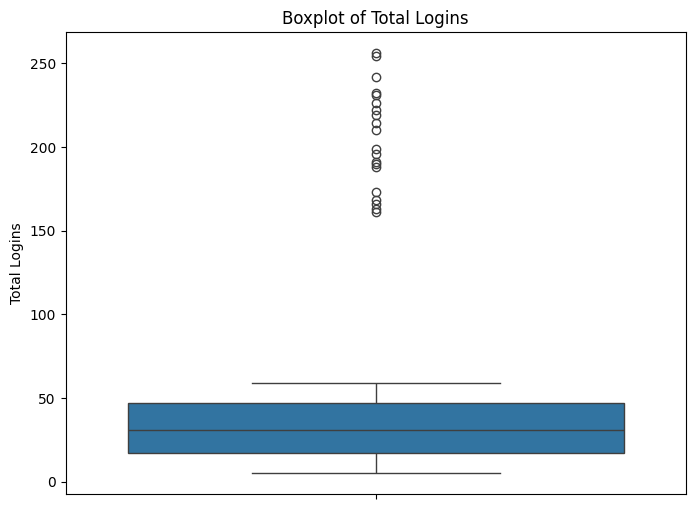

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['total_logins'])
plt.title('Boxplot of Total Logins')
plt.ylabel('Total Logins')
plt.show()

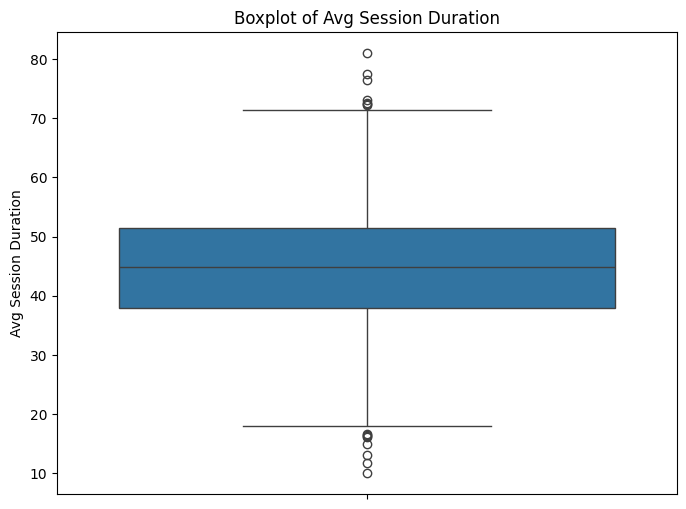

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['avg_session_duration'])
plt.title('Boxplot of Avg Session Duration')
plt.ylabel('Avg Session Duration')
plt.show()

# **Eksplorasi Data (EDA)**

## **Comparison/Perbandingan**

**Aktivitas:**
Membandingkan total aktivitas login mahasiswa di setiap wilayah (region).

**Tujuan:**
Mengetahui wilayah dengan tingkat aktivitas login tertinggi serta melihat perbedaan aktivitas antar wilayah.

**Visualisasi:**
Bar Chart (Grafik Batang).

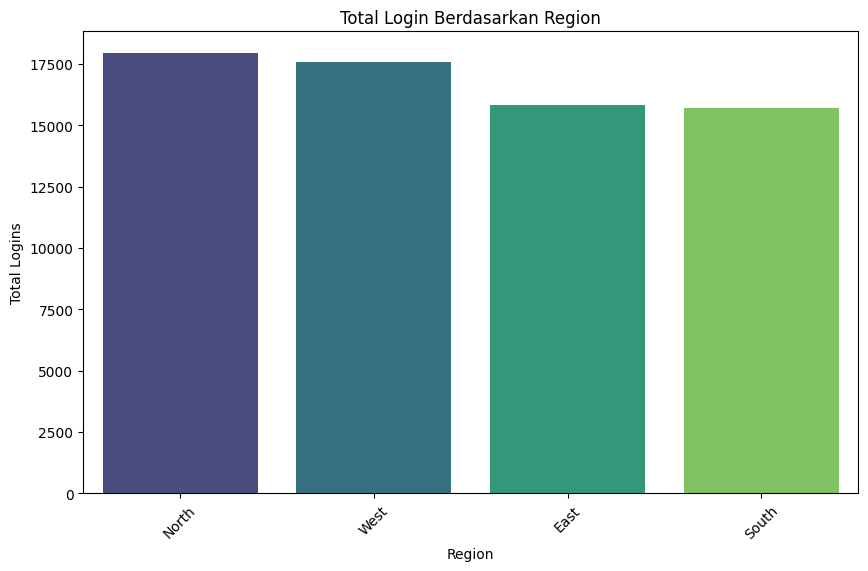

In [ ]:
login_region = df.groupby('region')['total_logins'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x=login_region.index,
    y=login_region.values,
    palette='viridis',
    hue=login_region.index,
    legend=False
)
plt.title('Total Login Berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Total Logins')
plt.xticks(rotation=45)
plt.show()

Wilayah tempat siswa berada memiliki pengaruh terhadap tingkat aktivitas dan performa belajar.

## **Composition/Komposisi**

**Aktivitas:**
Melihat proporsi tingkat performa siswa berdasarkan performance_label.

**Tujuan:**
Mengetahui persentase siswa pada setiap kategori performa (rendah, sedang, tinggi).

**Visualisasi:**
Pie Chart (Grafik Lingkaran).

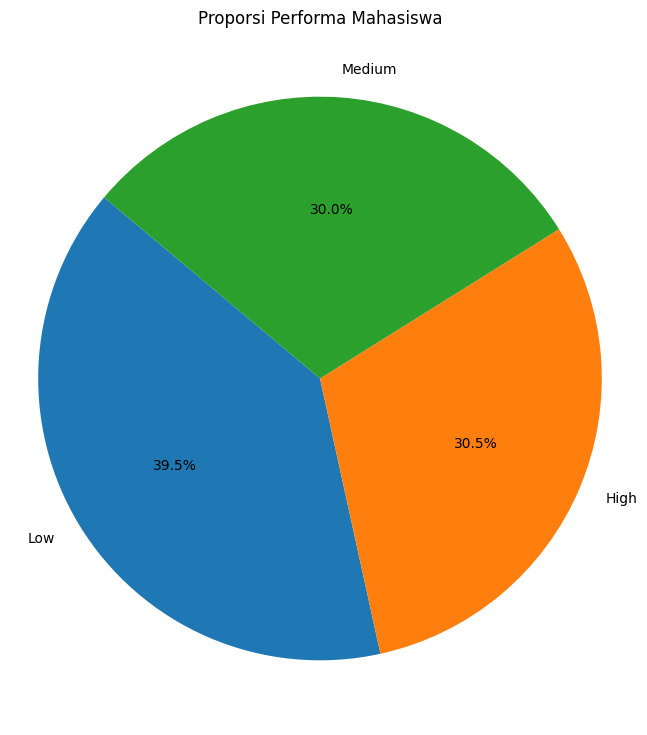

In [ ]:
performance_dist = df['performance_label'].value_counts()

plt.figure(figsize=(8, 9))
performance_dist.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Proporsi Performa Mahasiswa')
plt.ylabel('')
plt.axis('equal')
plt.show()

Mayoritas siswa memiliki performa yang cukup stabil, namun masih ada kelompok yang perlu perhatian khusus untuk peningkatan belajar.

## **Distribution/Distribusi**

**Aktivitas:**
Menganalisis penyebaran nilai overall_performance_score.

**Tujuan:**
Melihat apakah nilai performa siswa cenderung rendah, sedang, atau tinggi serta mengetahui pola distribusinya.

**Visualisasi:**
Histogram.

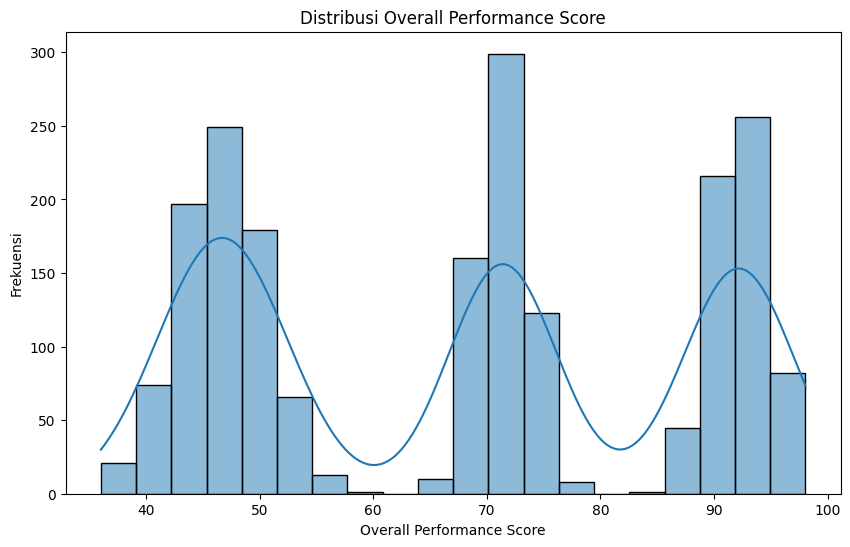

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['overall_performance_score'], bins=20, kde=True)
plt.title('Distribusi Overall Performance Score')
plt.xlabel('Overall Performance Score')
plt.ylabel('Frekuensi')
plt.show()

Secara umum, performa akademik siswa berada pada tingkat sedang dan tidak terlalu timpang.

## **Relationship/Hubungan**

**Aktivitas:**
Menganalisis hubungan antara tingkat kehadiran (attendance_percentage) dengan skor performa keseluruhan.

**Tujuan:**
Mengetahui apakah kehadiran siswa berpengaruh terhadap performa akademik.

**Visualisasi:**
Heatmap (Matriks Korelasi).

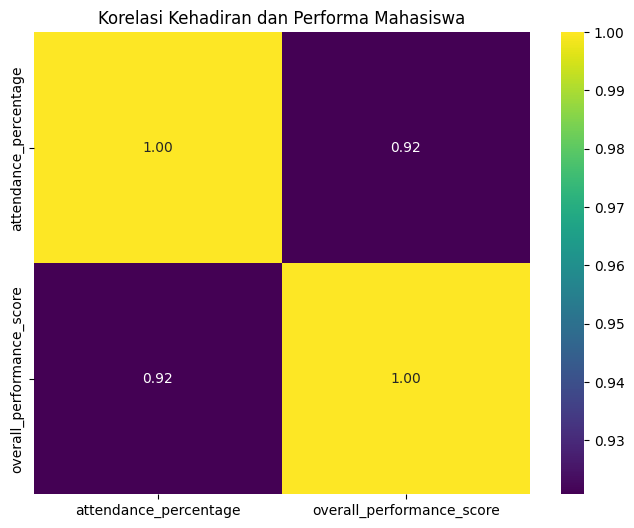

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['attendance_percentage', 'overall_performance_score']].corr(),
    annot=True,
    cmap='viridis',
    fmt='.2f'
)
plt.title('Korelasi Kehadiran dan Performa Mahasiswa')
plt.show()

Kehadiran berperan penting dalam performa siswa, tetapi bukan satu-satunya faktor penentu.

# **Data Preparation**

## **Data Type**

## **Inconsistent Values**

Langkah ini bertujuan untuk memastikan semua data teks (seperti nama wilayah atau kategori performa) memiliki format penulisan yang sama. Jika ada yang menulis dengan huruf kecil semua atau campuran, kita ubah semuanya menjadi huruf besar (Upper Case) agar komputer tidak bingung saat menghitung data.

In [5]:
# 1. Menyeragamkan kolom 'performance_label' (Status Performa)
df['performance_label'] = df['performance_label'].str.upper()

# 2. Menyeragamkan kolom 'region' (Wilayah)
df['region'] = df['region'].str.upper()

# 3. Menyeragamkan kolom 'socioeconomic_status' (Status Ekonomi)
df['socioeconomic_status'] = df['socioeconomic_status'].str.upper()

# Menampilkan hasil unik untuk memastikan data sudah rapi
print(df['performance_label'].unique())
print(df['region'].unique())

['HIGH' 'LOW' 'MEDIUM']
['WEST' 'SOUTH' 'NORTH' 'EAST']


**Penjelasan:**

Berdasarkan pengecekan yang dilakukan, berikut hasilnya:

* **Standarisasi Teks:** Semua data pada kolom kategori (seperti Wilayah dan Label Performa) sudah diubah menjadi huruf kapital. Ini dilakukan supaya tidak ada data yang dianggap berbeda hanya karena perbedaan huruf besar/kecil.

* **Kualitas Data:** Setelah dicek, tidak ditemukan kesalahan penulisan (typo) pada kategori utama. Semuanya sudah konsisten.

* **Kerapian:** Tidak ditemukan spasi kosong yang tidak perlu di awal atau akhir kata yang bisa merusak analisis.

**Kesimpulan:**
Data sudah konsisten dan bersih. Langkah ini memastikan bahwa saat kita membuat grafik nanti, perhitungan jumlah siswa per wilayah atau per kategori performa akan akurat 100%.

## **Missing Values**

Langkah ini dilakukan untuk mendeteksi apakah terdapat data yang kosong di dalam dataset. Pengecekan ini sangat penting untuk menjamin kualitas data, karena adanya nilai yang hilang dapat menyebabkan hasil analisis menjadi tidak akurat atau bias.

In [6]:
print((df.isna().sum() / len(df)) * 100)

student_id                     0.0
age                            0.0
gender                         0.0
socioeconomic_status           0.0
region                         0.0
total_logins                   0.0
weekly_login_count             0.0
avg_session_duration           3.0
resource_click_count           3.0
forum_posts                    0.0
quiz_attempts_count            0.0
video_watch_completion_rate    0.0
daily_internet_usage_mins      3.0
edu_sites_visit_count          0.0
nonedu_sites_visit_count       0.0
peak_usage_time                0.0
tab_switch_count               0.0
total_classes                  0.0
classes_attended               0.0
assignment_score_avg           0.0
quiz_score_avg                 3.0
midterm_exam_score             0.0
final_exam_score               0.0
attendance_percentage          0.0
overall_performance_score      0.0
performance_label              0.0
dtype: float64


**Analisis Temuan:**

Berdasarkan hasil pengecekan, terdapat nilai kosong sebesar **3.0%** pada beberapa kolom numerik seperti:
* **avg_session_duration**,
* **resource_click_count**,
* **daily_internet_usage_mins**,
* **quiz_score_avg**.

**Penanganan Data (Imputasi):**

Untuk menjaga agar jumlah data tidak berkurang, kita akan melakukan imputasi menggunakan nilai Mean (Rata-rata) untuk kolom-kolom numerik yang bermasalah tersebut. Ini dilakukan agar distribusi data tetap terjaga.

In [7]:
df['avg_session_duration'] = df['avg_session_duration'].fillna(df['avg_session_duration'].dropna().mean())
df['resource_click_count'] = df['resource_click_count'].fillna(df['resource_click_count'].dropna().mean())
df['daily_internet_usage_mins'] = df['daily_internet_usage_mins'].fillna(df['daily_internet_usage_mins'].dropna().mean())
df['quiz_score_avg'] = df['quiz_score_avg'].fillna(df['quiz_score_avg'].dropna().mean())

**Verifikasi Akhir:**

Setelah dilakukan imputasi, kita lakukan pengecekan ulang untuk memastikan seluruh kolom sudah ditangani

In [8]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
student_id,0.0
age,0.0
gender,0.0
socioeconomic_status,0.0
region,0.0
total_logins,0.0
weekly_login_count,0.0
avg_session_duration,0.0
resource_click_count,0.0
forum_posts,0.0


**Kesimpulan:**

Seluruh missing values telah berhasil ditangani dengan metode imputasi rata-rata. Dataset kini sudah lengkap dan siap untuk digunakan dalam tahap analisis berikutnya tanpa adanya risiko bias akibat data yang kosong.

## **Duplicated Values**

Tahap ini bertujuan untuk memastikan tidak ada data ganda yang tersimpan. Data duplikat bisa menyebabkan perhitungan statistik menjadi tidak akurat.

In [14]:
df[df.duplicated()]

,student_id,age,gender,socioeconomic_status,region,total_logins,weekly_login_count,avg_session_duration,resource_click_count,forum_posts,...,tab_switch_count,total_classes,classes_attended,assignment_score_avg,quiz_score_avg,midterm_exam_score,final_exam_score,attendance_percentage,overall_performance_score,performance_label


In [13]:
df = df.drop_duplicates()

**Penjelasan:**

Ditahap ini kita menggunakan perintah **df.duplicated()** untuk mengidentifikasi baris yang memiliki nilai identik di semua kolom. Jika ditemukan, baris ganda tersebut dihapus menggunakan **drop_duplicates().**

**Kesimpulann:**

Setelah dilakukan pengecekan, tidak ditemukan adanya data duplikat dalam dataset ini. Hal ini menandakan bahwa dataset sudah bersih dan setiap baris data benar-benar mewakili satu identitas siswa yang berbeda.

## **Outliers Values**

Outlier adalah nilai yang terlalu jauh dari jangkauan data lainnya, misalnya ada nilai yang terlalu tinggi atau terlalu rendah dibandingkan mayoritas data siswa. Data seperti ini perlu dirapikan supaya tidak mengacaukan hasil rata-rata dan distribusi data nantinya.

In [18]:
results = []
cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['student_id'], errors='ignore')

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
display(results_df)

,Persentase Outliers
Kolom,
age,0.00
total_logins,1.00
weekly_login_count,0.00
avg_session_duration,0.00
resource_click_count,0.00
forum_posts,0.80
quiz_attempts_count,0.00
video_watch_completion_rate,0.00
daily_internet_usage_mins,0.00


Meskipun persentasenya tergolong kecil (di bawah 1%), keberadaan outlier pada kolom seperti jumlah postingan forum atau kunjungan situs pendidikan tetap perlu ditangani. Hal ini dilakukan agar nilai-nilai ekstrem tersebut tidak memengaruhi hasil perhitungan rata-rata secara keseluruhan.

Oleh karena itu, tahap selanjutnya adalah melakukan Clipping untuk merapikan nilai-nilai tersebut agar masuk ke dalam rentang batas atas dan batas bawah yang wajar. Dengan begitu, data tetap bisa digunakan tanpa harus menghapus baris siswa tersebut dari dataset.

In [19]:
columns_to_impute = ["avg_session_duration", "daily_internet_usage_mins", "quiz_score_avg"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

**Kesimpulan:**

data ini secara umum sudah sangat bagus karena hampir semua kolom penting memiliki persentase outlier 0%. Meski ada sedikit nilai ekstrem di bagian aktivitas digital (seperti jumlah login), jumlahnya sangat kecil karena di bawah 1%. Dengan menggunakan teknik clipping, nilai-nilai yang terlalu jauh tersebut berhasil dirapikan tanpa harus menghapus data siswanya. Hasilnya, dataset jadi lebih stabil dan siap dianalisis dengan lebih akurat tanpa terganggu angka-angka yang terlalu mencolok.

# **Construct Data**

# **Reduct Data**

Reduksi data bertujuan untuk menyederhanakan dataset dengan membuang variabel yang tidak memiliki kontribusi langsung dalam analisis. Dataset yang ringkas akan mempermudah fokus pada informasi yang paling penting.

In [34]:
df = df.drop('student_id', axis=1)

df = df[df['region'] != 'UNKNOWN']

display(df.head())

,age,gender,socioeconomic_status,region,total_logins,weekly_login_count,avg_session_duration,resource_click_count,forum_posts,quiz_attempts_count,...,tab_switch_count,total_classes,classes_attended,assignment_score_avg,quiz_score_avg,midterm_exam_score,final_exam_score,attendance_percentage,overall_performance_score,performance_label
0,19,Male,High,West,59,6,66.079121,22.0,2,3,...,12,60,55,88.9,100.0,93.2,91.9,91.67,93.31,High
1,24,Female,Medium,South,19,9,52.658783,50.0,2,2,...,2,60,41,50.4,36.6,57.3,39.5,68.33,46.44,Low
2,23,Male,Medium,North,44,2,45.854387,10.0,2,4,...,4,60,48,77.6,74.2,66.8,71.5,80.00,71.85,High
3,23,Female,Medium,East,43,4,48.918866,76.0,0,2,...,4,60,52,76.8,63.7,74.7,70.0,86.67,71.51,Medium
4,17,Male,High,North,28,2,59.170770,31.0,3,2,...,4,60,47,69.5,67.1,67.9,68.5,78.33,68.24,Medium


**Penjelasan:**

* **Penggunaan df.drop('student_id', axis=1):** Perintah ini berfungsi untuk membuang kolom student_id dari dataset. Kolom ini dihapus karena merupakan identitas unik yang tidak memiliki nilai statistik untuk diolah. Penghapusan dilakukan pada axis=1 yang merujuk pada sumbu kolom.

* **Penggunaan df[df['region'] != 'UNKNOWN']:**
Kode ini berfungsi untuk menyaring (filtering) baris data. Tujuannya adalah membuang data siswa yang memiliki kategori wilayah 'UNKNOWN'. Dengan cara ini, data yang tertinggal hanyalah data yang valid dan informatif.

* **Penggunaan display(df.head()):**
Perintah ini digunakan untuk menampilkan 5 baris teratas dataset guna memastikan secara visual bahwa kolom student_id sudah berhasil dihapus dan data sudah bersih.

**Kesimpulan:**

Kolom seperti student_id hanyalah label identitas dan tidak memiliki nilai statistik untuk diolah. Dengan membuang kolom melalui perintah drop dan menyaring baris yang tidak valid dengan teknik filtering, dataset menjadi lebih ringan. Hal ini memastikan proses analisis nantinya akan jauh lebih efektif karena fokus sepenuhnya tertuju pada variabel-variabel yang benar-benar memengaruhi hasil belajar siswa tanpa terganggu oleh data yang tidak relevan.

# **Menyimpan DataSet Bersih**

In [35]:
df.to_csv("[CLEAN]Student_Performance_Data.csv", index=False)